In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

testingdata = pd.read_csv('testData.txt', sep=',')
trainingdata = pd.read_csv('trainData.txt', sep=',')

testingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [38]:
trainingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [39]:
print(testingdata.shape)
print(trainingdata.shape)

(9752, 7)
(8143, 7)


In [40]:
X = trainingdata.iloc[:5000, 1:6]
Y = testingdata.iloc[:5000, -1:]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=0)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(4000, 5) (4000, 1) (1000, 5) (1000, 1)


In [41]:
model1 = tf.keras.Sequential()
model1.add(Dense(16, activation='relu',input_shape=(5, ))) 
model1.add(Dense(32, activation='softplus')) 
model1.add(Dense(1, activation='sigmoid')) 
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 16)                96        
                                                                 
 dense_15 (Dense)            (None, 32)                544       
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [42]:
loss_function = tf.keras.losses.BinaryCrossentropy()
model1.compile(optimizer= 'adam', loss= loss_function, metrics=['accuracy'])

In [43]:
training_loss, training_acc = model1.evaluate(train_x, train_y)
testing_loss, testing_acc = model1.evaluate(test_x, test_y)

32/32 [==============================] - 0s 2ms/step - loss: 3.1387 - accuracy: 0.8040


In [44]:
pred = model1.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 1ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.8571 - accuracy: 0.7743 - val_loss: 0.6996 - val_accuracy: 0.6975
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.7861 - val_loss: 0.4700 - val_accuracy: 0.8083
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4617 - accuracy: 0.8057 - val_loss: 0.5642 - val_accuracy: 0.8067
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.5335 - accuracy: 0.7993 - val_loss: 0.4392 - val_accuracy: 0.8200
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4200 - accuracy: 0.8204 - val_loss: 0.4526 - val_accuracy: 0.8083


Text(0, 0.5, 'Accuracy')

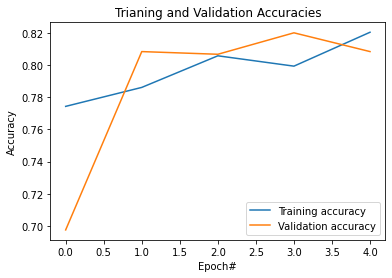

In [45]:
fitModel = model1.fit(train_x, train_y, epochs = 5, validation_split = 0.3)

plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

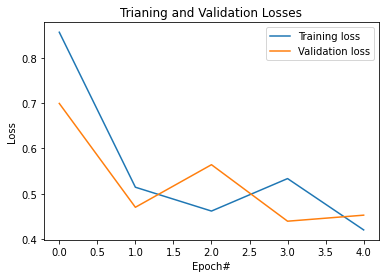

In [46]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')

In [47]:
test_predict = model1.predict(test_x)
test_predict_labels = np.argmax(test_predict, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels = test_y, predictions = test_predict_labels)
print('confusion Matrix\n', confusion_matrix)

32/32 [==============================] - 0s 8ms/step
confusion Matrix
 tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


In [48]:
model2 = tf.keras.Sequential()
model2.add(Dense(16, activation='relu',input_shape=(5, ))) 
model2.add(Dense(32, activation='softplus'))
model2.add(Dense(32, activation='softplus')) 
model2.add(Dense(1, activation='sigmoid')) 
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                96        
                                                                 
 dense_18 (Dense)            (None, 32)                544       
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [49]:
lossfunction = tf.keras.losses.BinaryCrossentropy()
model2.compile(optimizer= 'adam', loss= lossfunction, metrics=['accuracy'])
fitmodel = model2.fit(train_x, train_y, epochs=5, validation_split=0.3)
training_loss, training_acc = model2.evaluate(train_x, train_y)
testing_loss, testing_acc = model2.evaluate(test_x, test_y)

Epoch 1/5
88/88 [==============================] - 2s 13ms/step - loss: 2.5544 - accuracy: 0.7014 - val_loss: 0.6262 - val_accuracy: 0.7383
Epoch 2/5
88/88 [==============================] - 1s 6ms/step - loss: 0.6136 - accuracy: 0.7800 - val_loss: 0.4901 - val_accuracy: 0.7925
Epoch 3/5
88/88 [==============================] - 1s 7ms/step - loss: 0.5065 - accuracy: 0.7911 - val_loss: 0.4651 - val_accuracy: 0.7992
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.8164 - val_loss: 0.4032 - val_accuracy: 0.8175
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7790


In [50]:
pred = model2.predict(test_x)
test_pred = np.argmax(pred, axis = 1)
confusion_matrix = tf.math.confusion_matrix(labels= test_y, predictions=test_pred)
print(confusion_matrix)

32/32 [==============================] - 0s 2ms/step
tf.Tensor(
[[804   0]
 [196   0]], shape=(2, 2), dtype=int32)


Epoch 1/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4265 - accuracy: 0.8221 - val_loss: 0.4550 - val_accuracy: 0.8042
Epoch 2/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.8132 - val_loss: 0.4128 - val_accuracy: 0.8275
Epoch 3/5
88/88 [==============================] - 0s 3ms/step - loss: 0.4060 - accuracy: 0.8261 - val_loss: 0.4100 - val_accuracy: 0.7775
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8261 - val_loss: 0.3669 - val_accuracy: 0.8200
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.3866 - accuracy: 0.8293 - val_loss: 0.3614 - val_accuracy: 0.8292


Text(0, 0.5, 'Accuracy')

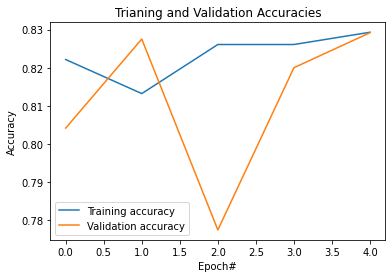

In [51]:
fitModel = model2.fit(train_x, train_y, epochs = 5, validation_split = 0.3)
plt.plot(fitModel.history['accuracy'])
plt.plot(fitModel.history['val_accuracy'])
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.title('Trianing and Validation Accuracies')
plt.xlabel('Epoch#')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

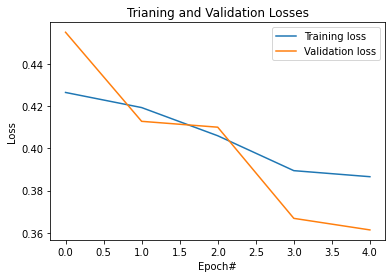

In [52]:
plt.plot(fitModel.history['loss'])
plt.plot(fitModel.history['val_loss'])
plt.legend(['Training loss', 'Validation loss'])
plt.title('Trianing and Validation Losses')
plt.xlabel('Epoch#')
plt.ylabel('Loss')